In [81]:
import requests
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import json
from config import weather_api_key

In [82]:
url = "https://api.openweathermap.org/data/3.0/onecall/timemachine?"
units = "imperial"

# Reading CSV Data

In [83]:
# Reading the CSV
uber_csv = pd.read_csv("Resources/uber.csv")

uber_df = pd.DataFrame(uber_csv)

uber_df.head()



,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [84]:
# Renaming the headers
uber_df.rename(columns = {'Unnamed: 0':'ID', 'key':'N/A', 'fare_amount':'Charge', "pickup_datetime":"Pickup Time",  "pickup_longitude": "Pickup Lon", "pickup_latitude":"Pickup Lat",  
                          "dropoff_longitude": "Dropoff Lon", "dropoff_latitude": "Dropoff Lat", "passenger_count": "Passenger Count"}, inplace = True)

uber_df.head()



,ID,N/A,Charge,Pickup Time,Pickup Lon,Pickup Lat,Dropoff Lon,Dropoff Lat,Passenger Count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [85]:
# Grabbing a sample of the data
uber_df3 = uber_df.sample(n=5)
uber_df3.head()

,ID,N/A,Charge,Pickup Time,Pickup Lon,Pickup Lat,Dropoff Lon,Dropoff Lat,Passenger Count
21848,43984357,2013-11-13 22:27:21.0000005,18.0,2013-11-13 22:27:21 UTC,-73.983566,40.766230,-73.927338,40.766212,1
37054,42904472,2012-02-12 12:00:00.000000185,7.3,2012-02-12 12:00:00 UTC,-74.014348,40.709618,-73.997898,40.715853,1
10056,3902503,2015-01-10 18:38:59.0000006,7.0,2015-01-10 18:38:59 UTC,-73.977898,40.725349,-73.993668,40.733131,1
196499,41092258,2011-12-23 02:37:27.0000002,8.5,2011-12-23 02:37:27 UTC,-74.007640,40.740077,-73.984560,40.748271,1
78527,14856486,2014-02-22 09:27:04.0000001,11.5,2014-02-22 09:27:04 UTC,-74.000931,40.742407,-73.967382,40.757578,1


# Formatting Data

In [86]:
# Formatting the date step one
uber_df3['Date Formatted'] = (pd.to_datetime(uber_df3['Pickup Time'], yearfirst=True, utc=True)) 
 
uber_df3.head()


,ID,N/A,Charge,Pickup Time,Pickup Lon,Pickup Lat,Dropoff Lon,Dropoff Lat,Passenger Count,Date Formatted
21848,43984357,2013-11-13 22:27:21.0000005,18.0,2013-11-13 22:27:21 UTC,-73.983566,40.766230,-73.927338,40.766212,1,2013-11-13 22:27:21+00:00
37054,42904472,2012-02-12 12:00:00.000000185,7.3,2012-02-12 12:00:00 UTC,-74.014348,40.709618,-73.997898,40.715853,1,2012-02-12 12:00:00+00:00
10056,3902503,2015-01-10 18:38:59.0000006,7.0,2015-01-10 18:38:59 UTC,-73.977898,40.725349,-73.993668,40.733131,1,2015-01-10 18:38:59+00:00
196499,41092258,2011-12-23 02:37:27.0000002,8.5,2011-12-23 02:37:27 UTC,-74.007640,40.740077,-73.984560,40.748271,1,2011-12-23 02:37:27+00:00
78527,14856486,2014-02-22 09:27:04.0000001,11.5,2014-02-22 09:27:04 UTC,-74.000931,40.742407,-73.967382,40.757578,1,2014-02-22 09:27:04+00:00


In [87]:
# Final Formatted date added to dataframe
uber_df3['Date Formatted Final'] = (uber_df3["Date Formatted"] - pd.Timestamp("1970-01-01", tz="UTC")) // pd.Timedelta('1s')

uber_df3.head()

,ID,N/A,Charge,Pickup Time,Pickup Lon,Pickup Lat,Dropoff Lon,Dropoff Lat,Passenger Count,Date Formatted,Date Formatted Final
21848,43984357,2013-11-13 22:27:21.0000005,18.0,2013-11-13 22:27:21 UTC,-73.983566,40.766230,-73.927338,40.766212,1,2013-11-13 22:27:21+00:00,1384381641
37054,42904472,2012-02-12 12:00:00.000000185,7.3,2012-02-12 12:00:00 UTC,-74.014348,40.709618,-73.997898,40.715853,1,2012-02-12 12:00:00+00:00,1329048000
10056,3902503,2015-01-10 18:38:59.0000006,7.0,2015-01-10 18:38:59 UTC,-73.977898,40.725349,-73.993668,40.733131,1,2015-01-10 18:38:59+00:00,1420915139
196499,41092258,2011-12-23 02:37:27.0000002,8.5,2011-12-23 02:37:27 UTC,-74.007640,40.740077,-73.984560,40.748271,1,2011-12-23 02:37:27+00:00,1324607847
78527,14856486,2014-02-22 09:27:04.0000001,11.5,2014-02-22 09:27:04 UTC,-74.000931,40.742407,-73.967382,40.757578,1,2014-02-22 09:27:04+00:00,1393061224


In [88]:
#Creating the clean dataframe
clean_df = uber_df3[["ID", "Charge", "Pickup Lon", "Pickup Lat", "Dropoff Lon", "Dropoff Lat", "Passenger Count", "Date Formatted Final" ]]


clean_df.head()

,ID,Charge,Pickup Lon,Pickup Lat,Dropoff Lon,Dropoff Lat,Passenger Count,Date Formatted Final
21848,43984357,18.0,-73.983566,40.766230,-73.927338,40.766212,1,1384381641
37054,42904472,7.3,-74.014348,40.709618,-73.997898,40.715853,1,1329048000
10056,3902503,7.0,-73.977898,40.725349,-73.993668,40.733131,1,1420915139
196499,41092258,8.5,-74.007640,40.740077,-73.984560,40.748271,1,1324607847
78527,14856486,11.5,-74.000931,40.742407,-73.967382,40.757578,1,1393061224


# Gathering info for our hypothesis tests

In [89]:
# Making the list for data 
uber_data = []

# Looping through the data
for i, row in clean_df.iterrows():

    # Gathering the latitude, longitude, and pickup time
    lat = row['Pickup Lat']
    lon = row['Pickup Lon']
    date = row['Date Formatted Final'].astype(int)
    
    # Making the query for the search using the varibles
    query_url = f"{url}lat={lat}&lon={lon}&dt={date}&appid={weather_api_key}&units={units}"
    
    # Getting the info from the api
    response = requests.get(query_url).json()

    # Gathering variables for statistics
    temp = response['data'][0]['temp']
    hum = response['data'][0]['humidity']
    desc = response['data'][0]['weather'][0]['main']

    # Placing variables into a dictionary
    uber_data.append({"Pickup Lat": lat,
                            "Temp (F)": temp,
                            "Humidity %": hum,
                            "Description": desc
    })


    
    
   

In [90]:
# Making the weather dataframe
weather_df = pd.DataFrame(uber_data)

weather_df.head()

,Pickup Lat,Temp (F),Humidity %,Description
0,40.766230,37.42,35,Clear
1,40.709618,23.47,53,Clouds
2,40.725349,22.30,35,Clear
3,40.740077,53.78,57,Clouds
4,40.742407,42.58,59,Fog


In [91]:
# Merging the data for statistical use
final_df = clean_df.merge(weather_df, on = "Pickup Lat")

final_df.head()

,ID,Charge,Pickup Lon,Pickup Lat,Dropoff Lon,Dropoff Lat,Passenger Count,Date Formatted Final,Temp (F),Humidity %,Description
0,43984357,18.0,-73.983566,40.766230,-73.927338,40.766212,1,1384381641,37.42,35,Clear
1,42904472,7.3,-74.014348,40.709618,-73.997898,40.715853,1,1329048000,23.47,53,Clouds
2,3902503,7.0,-73.977898,40.725349,-73.993668,40.733131,1,1420915139,22.30,35,Clear
3,41092258,8.5,-74.007640,40.740077,-73.984560,40.748271,1,1324607847,53.78,57,Clouds
4,14856486,11.5,-74.000931,40.742407,-73.967382,40.757578,1,1393061224,42.58,59,Fog


In [92]:
desc_group = final_df.groupby(['Description']).mean()
desc_group = desc_group.drop(columns=['ID', 'Pickup Lon', 'Pickup Lat',
'Dropoff Lon', 'Dropoff Lat', 'Date Formatted Final'])
desc_group.head(20)

,Charge,Passenger Count,Temp (F),Humidity %
Description,,,,
Clear,12.5,1.0,29.860,35.0
Clouds,7.9,1.0,38.625,55.0
Fog,11.5,1.0,42.580,59.0


In [93]:
# Create temp bins
bins = [0, 19.9, 39.9, 59.9, 79.9, 99.9, 100]


# Create names for the bins
temp_names = ['0-19','20-39','40-59','60-79','80-99','Over 100']

In [94]:
# Create new data frame
final_df['Temp Summary'] = pd.cut(final_df['Temp (F)'], bins, labels=temp_names)


final_df


,ID,Charge,Pickup Lon,Pickup Lat,Dropoff Lon,Dropoff Lat,Passenger Count,Date Formatted Final,Temp (F),Humidity %,Description,Temp Summary
0,43984357,18.0,-73.983566,40.766230,-73.927338,40.766212,1,1384381641,37.42,35,Clear,20-39
1,42904472,7.3,-74.014348,40.709618,-73.997898,40.715853,1,1329048000,23.47,53,Clouds,20-39
2,3902503,7.0,-73.977898,40.725349,-73.993668,40.733131,1,1420915139,22.30,35,Clear,20-39
3,41092258,8.5,-74.007640,40.740077,-73.984560,40.748271,1,1324607847,53.78,57,Clouds,40-59
4,14856486,11.5,-74.000931,40.742407,-73.967382,40.757578,1,1393061224,42.58,59,Fog,40-59


In [95]:
weather_labels = final_df["Description"].unique()
weather_count = final_df["Description"].value_counts()
weather_count

Clouds    2
Clear     2
Fog       1
Name: Description, dtype: int64

# Graphing the data
Now we must take a closer look to understand this data

In [96]:
# Creating a linear regression fuction
def lregress(x, y, var):
    
    res = stats.linregress(x, y)

    print(f"R-squared: {res.rvalue**2:.6f}")

    plt.scatter(x, y, marker="d", color="red", label= "Data")
    plt.plot(x, res.intercept + res.slope*x, label = "Regression Line")
    plt.title("Linear Regression")
    plt.xlabel("Latitude")
    plt.ylabel(f"{var}")
    plt.legend()
    plt.show()

## Weather vs. Uber Rides



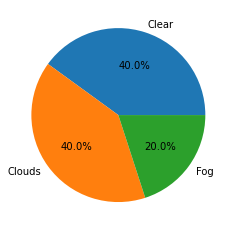

In [97]:
plt.pie(weather_count, labels = weather_labels, autopct = "%1.1f%%")

# Save Figure in png file inside Resources Folder
plt.savefig("Resources/pie_chart.png")


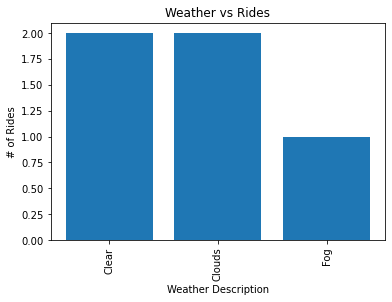

In [98]:
plt.bar(weather_labels, weather_count)
plt.title("Weather vs Rides")
plt.xlabel("Weather Description")
plt.ylabel("# of Rides")
plt.xticks(rotation = 90)

# Save Figure in png file inside Resources folder
plt.savefig("Resources/WeathervsRides.png")

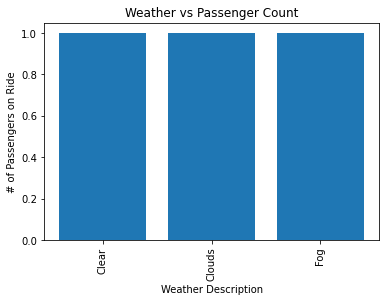

In [99]:
plt.bar(final_df["Description"], final_df["Passenger Count"])
plt.title("Weather vs Passenger Count")
plt.xlabel("Weather Description")
plt.ylabel("# of Passengers on Ride")
plt.xticks(rotation = 90)

# Save Figure in png file inside Resources Folder
plt.savefig("Resources/WeathervsPassengerCount.png")


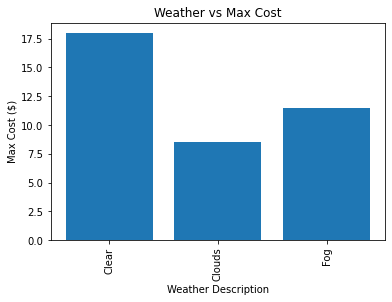

In [100]:
plt.bar(final_df["Description"], final_df["Charge"])
plt.title("Weather vs Max Cost")
plt.xlabel("Weather Description")
plt.ylabel("Max Cost ($)")
plt.xticks(rotation = 90)

# Save Figure in png file inside Resources Folder
plt.savefig("Resources/WeathervsMaxCost.png")

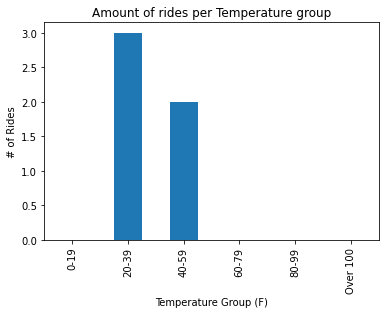

In [115]:
final_df["Temp Summary"].value_counts().sort_index().plot(kind = "bar")
plt.title("Amount of rides per Temperature group")
plt.xlabel("Temperature Group (F)")
plt.ylabel("# of Rides")

# Save Figure in png file inside Resources Folder
plt.savefig("Resources/RidesvsTemp.png")

R-squared: 0.320515


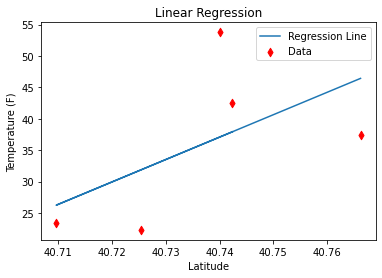

<Figure size 432x288 with 0 Axes>

In [102]:
lregress(final_df["Pickup Lat"], final_df["Temp (F)"], "Temperature (F)")

# Save Figure in png file inside Resources Folder
#plt.savefig("Resources/LinearRegressionlattemp.png")

Text(0, 0.5, 'Temperature (F)')

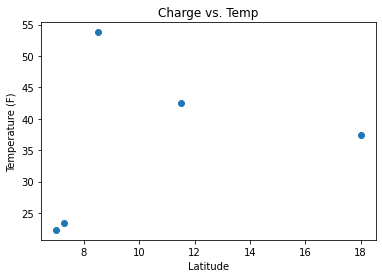

In [103]:
plt.scatter(final_df["Charge"], final_df["Temp (F)"])
plt.title("Charge vs. Temp")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

# Save Figure in png file inside Resources Folder
plt.savefig("Resources/chargevsTemp.png")

R-squared: 0.082165


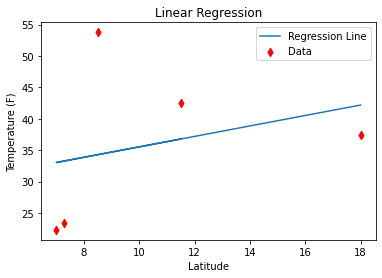

In [104]:
lregress(final_df["Charge"], final_df["Temp (F)"], "Temperature (F)")

# Save Figure in png file inside Resources Folder
#plt.savefig("Resources/LinearRegressionchargetemp.png")